### 출처 : https://ivo-lee.tistory.com/91 (0310 - 이미지 데이터 전처리, ivo_lee )

## 이미지 로드

#### •  머신러닝을 이미지에 적용하기 전에 학습 알고리즘이 사용할 수 있는 특성으로 변환해야 합니다.



In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
cv2.__version__ #OpenCV 버전 확인

'4.5.2'

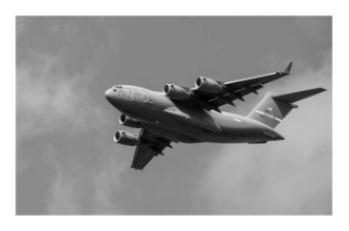

- 데이터 타입: <class 'numpy.ndarray'>

- 이미지 데이터 확인:

 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]

- 차원을 확인 (해상도):

 (207, 319)


In [85]:
image = cv2.imread("./plane.png", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
plt.imshow(image, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()
print(f"- 데이터 타입: {type(image)}\n")
print(f"- 이미지 데이터 확인:\n\n {image}\n")
print(f"- 차원을 확인 (해상도):\n\n {image.shape}") 

#### •  흑백 이미지에서는 개별 원소의 값이 픽셀 강도입니다.
#### •  강도는 0~255까지의 범위를 가집니다.
#### •  OpenCV는 BGR을 사용하며, Matplot lib을 비롯하여 대부분의 이미지 애플리케이션은 RGB를 사용합니다.
#### •  Matplotlib에서 OpenCV 컬러 이미지를 올바르게 출력하려면 먼저 컬러를 RGB로 변환합니다.

#### 컬러로 이미지를 로드합니다.

데이터 확인: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
픽셀을 확인: [255 255 255]
- 차원을 확인 (해상도):

 (207, 319, 3)


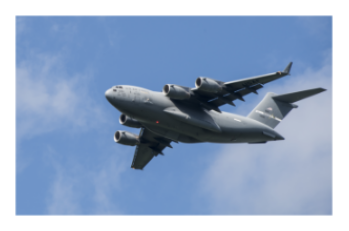

In [86]:
image_bgr = cv2.imread("./plane.png", cv2.IMREAD_COLOR)
print(f"데이터 확인: {image_bgr}") 
print(f"픽셀을 확인: {image_bgr[0,0]}") 
print(f"- 차원을 확인 (해상도):\n\n {image_bgr.shape}") 

image_256X256 = cv2.resize(image_bgr, (256, 256)) # 이미지 크기를 245X256 픽셀로 변경

#plane_256X256.png 저장
cv2.imwrite("./plane_256X256.png", image_256X256) # 이미지를 저장

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # RGB로 변환
plt.imshow(image_rgb), plt.axis("off") # 이미지를 출력
plt.show()

##  이미지 저장

#### •  OpenCV의 imwrite 사용 하여 전처리를 위한 이미지를 저장할 수 있습니다
#### •  이미지 포맷은 파일 확장자에 의해서 정의
#### •  imwrite가 에러나 확인 메시지 없이 기존의 파일을 overwrite한다

In [87]:
image = cv2.imread("./plane.png", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드

cv2.imwrite("./plane_new.png", image) # 이미지를 저장



True

## 이미지 크기 변경

#### •  resize() - 이미지 크기를 변경
#### •  전처리로서 이미지 크기 변경이 필요한 이유는 이미지들은 제각기 다양한 크기를 가지며, 특성으로 사용하려면 동
#### 일한 차원으로 만들어야 합니다.
#### •  이미지 행렬에 정보를 담고 있기 때문에 이미지 크기를 표준화하게 되면 이미지의 행렬 크기와 거기에 담긴 정보
#### 도 줄어듭니다.
#### •  머신러닝에서는 수천 또는 수십만 개의 이미지가 필요하며 이미지의 크기를 줄여서 메모리 사용량을 크게 줄일
#### 수 있습니다.
#### •  머신러닝에서 많이 사용하는 이미지 크기는 32X32 ,64X64 ,96X96 ,245X256 입니다

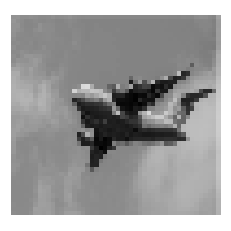

In [88]:
image = cv2.imread("./plane_new.png", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
image_50x50 = cv2.resize(image, (50, 50)) # 이미지 크기를 50x50 픽셀로 변경

plt.imshow(image_50x50, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()

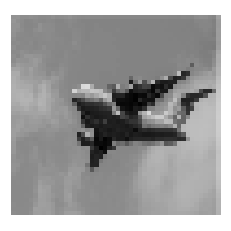

In [89]:
image = cv2.imread("./plane_new.png", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드

#출력!
plt.imshow(image_50x50, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()

<h1 style="color:teal"> 이미지 자르기 </h1>

#### •  이미지 주변을 제거하여 차원을 줄일 수 있습니다.
#### •  이미지는 2차원 넘파이 배열로 저장됩니다.
#### •   배열 슬라이싱을 사용해 간단하게 이미지를 자를 수 있습니다
#### •  OpenCV는 이미지를 행렬로 표현하므로 이미지에서 남기고 싶은 특정 부분을 행과 열을 선택하여 이미지 자르기
#### 기능을 사용합니다.

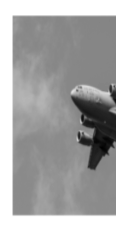

In [90]:
image = cv2.imread("./plane_256X256.png", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
image_cropped = image[:,:128] # 열의 처음 절반과 모든 행을 선택

plt.imshow(image_cropped, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()

<h1 style="color:teal"> 이미지 투명도 처리 </h1>

<ul>
    <li> 이미지를 흐리게 하려면 각 픽셀을 <span style="color:red;">주변 픽셀의 평균값</span>으로 변환합니다.</li>
<li> 주변 픽셀에 수행되는 연산을 수학적으로 <span style="color:red;">커널</span>이라 표현합니다.</li>
<li> 커널의 크기는 <span style="color:red;">흐림의 정도</span>를 결정합니다.</li>
<li> 커널이 클수록 이미지가 더 부드러워집니다.</li>
<li> 커널은 이미지를 선명하게 만드는 것부터 경계선 감지까지 이미지 처리 작업을 하는데 널리 사용됩니다.</li>
</ul>

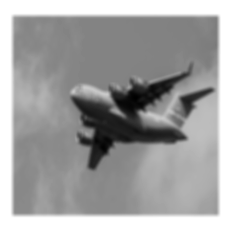

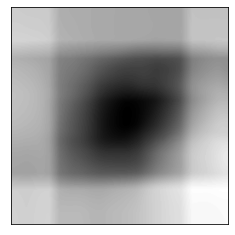

In [91]:
image = cv2.imread("./plane_256x256.png", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
#각 픽셀 주변의 5X5커널 평균값으로 이미지를 흐리게 합니다.
image_blurry = cv2.blur(image, (5,5))

plt.imshow(image_blurry, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()
# 커널 크기의 영향을 강조하기 위해 100X100 커널로 같은 이미지를 흐리게 합니다.
image_very_blurry = cv2.blur(image, (100,100))
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지를 출력
plt.show()

<ul>
<li> 커널은 이미지를 선명하게 만드는 것부터 경계선 감지까지 이미지 처리 작업을 하는데 널리 사용됩니다.</li>
<li>커널 PCA와 서포트 벡터 머신이 사용하는 비선형 함수를 커널이라 부릅니다.</li>
<li>Meanshift 알고리즘에서는 샘플의 영향 범위를 커널이라 부릅니다.</li>
<li>신경망의 가중치를 커널이라 부릅니다</li>
<li>커널 크기는 (너비, 높이)로 지정합니다.</li>
<li>주변 픽셀값의 평균을 계산하는 커널은 이미지를 흐리게 처리합니다.</li>
<li>blur 함수는 각 픽셀에 커널 개수의 역수를 곱하여 모두 더합니다. ( 이 값이 중앙 픽셀의 값이 됩니다.)</li>
</ul>

커널을 확인:

 [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]



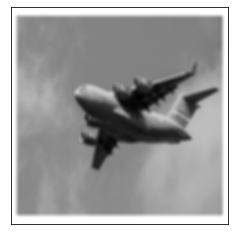

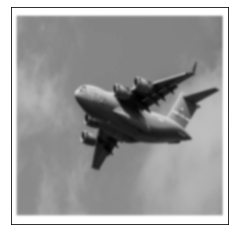

In [92]:
kernel = np.ones((5,5)) / 25.0 # 커널을 만듭니다.
print(f"커널을 확인:\n\n {kernel}\n") 
image_kernel = cv2.filter2D(image, -1, kernel) # 커널을 적용
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

image_very_blurry = cv2.GaussianBlur(image, (5,5), 0) # 가우시안 블러를 적용
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

[[0.0625]
 [0.25  ]
 [0.375 ]
 [0.25  ]
 [0.0625]]
[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


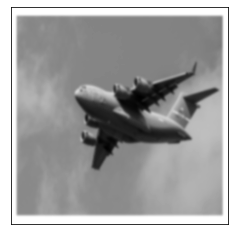

In [93]:
gaus_vector = cv2.getGaussianKernel(5, 0)
print(gaus_vector)
gaus_kernel = np.outer(gaus_vector, gaus_vector) # 벡터를 외적하여 커널을 만듭니다.
gaus_kernel
print(gaus_kernel)
# filter2D()로 커널을 이미지에 직접 적용하여 비슷한 흐림 효과를 만들 수 있습니다.
image_kernel = cv2.filter2D(image, -1, gaus_kernel) # 커널을 적용
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

<h1 style="color:teal"> 이미지 선명하게 하기 </h1>


<li>대상 픽셀을 강조하는 커널을 만들고 filter2D를 사용하여 이미지에 커널을 적용합니다</li>
<li>중앙 픽셀을 부각하는 커널을 만들면 이미지의 경계선에서 대비가 더욱 두드러지는 효과가 생깁니다.</li>

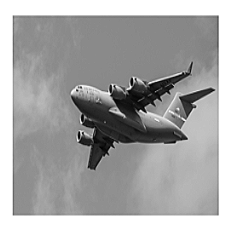

In [94]:
image = cv2.imread("./plane_256x256.png", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]]) # 커널을 만듭니다.

# 이미지를 선명하게 만듭니다.
image_sharp = cv2.filter2D(image, -1, kernel)

plt.imshow(image_sharp, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

<h1 style="color:teal"> 이미지 대비 높이기 </h1>

<li> 히스토그램 평활화는 객체의 형태가 두드러지도록 만들어주는 이미지 처리 도구입니다</li>
<li> Y는 루마(luma) 또는 밝기이고 U와 V는 컬러를 나타냅니다.</li>
<li> 흑백 이미지에는 OpenCV의 equalizeHist()를 바로 적용할 수 있습니다.</li>
<li> 히스토그램 평활화는 픽셀값의 범위가 커지도록 이미지를 변환합니다.</li>
<li> 히스토그램 평활화는 관심 대상을 다른 객체나 배경과 잘 구분되도록 만들어줍니다.</li>

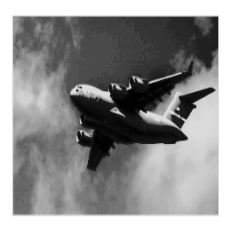

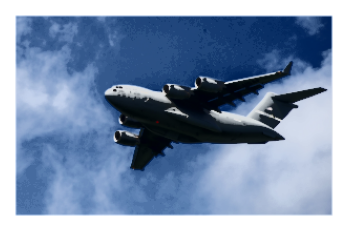

In [95]:
image = cv2.imread("./plane_256x256.png", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
image_enhanced = cv2.equalizeHist(image) # 이미지 대비를 향상시킵니다.
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

image_bgr = cv2.imread("./plane.png") # 이미지 로드
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB) # RGB로 바꿉니다.
plt.imshow(image_rgb), plt.axis("off") # 이미지 출력
plt.show()

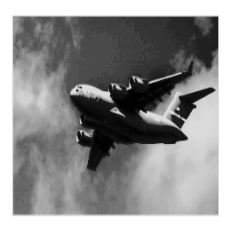

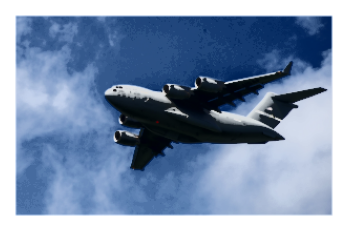

In [96]:
image = cv2.imread("./plane_256x256.png", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
image_enhanced = cv2.equalizeHist(image) # 이미지 대비를 향상시킵니다.
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

image_bgr = cv2.imread("./plane.png") # 이미지 로드
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB) # RGB로 바꿉니다.
plt.imshow(image_rgb), plt.axis("off") # 이미지 출력
plt.show()

<h1 style="color:teal"> 색상 구분 </h1>

<li>이미지에서 한 색상을 구분하려면 색 범위를 정의하고 이미지에 마스크를 적용합니다.</li>
<li>이미지를 HSV(색상, 채도, 명도)로 변환 -> 격리시킬 값의 범위를 정의 -> 이미지에 적용할 마스크를 만듭니다.(마스크의 흰색 영역만 유지)</li>
<li>bitwise_and()는 마스크를 적용하고 원하는 포맷으로 변환</li>

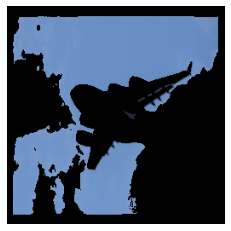

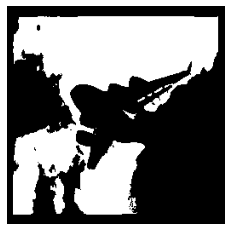

In [97]:
image_bgr = cv2.imread('./plane_256X256.png') # 이미지 로드
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV) # BGR에서 HSV로 변환
lower_blue = np.array([50,100,50]) # HSV에서 파랑 값의 범위를 정의
upper_blue = np.array([130,255,255])
mask = cv2.inRange(image_hsv, lower_blue, upper_blue) # 마스크를 만듭니다.
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask) # 이미지에 마스크를 적용
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB) # BGR에서 RGB로 변환

plt.imshow(image_rgb), plt.axis("off") # 이미지를 출력
plt.show()

plt.imshow(mask, cmap='gray'), plt.axis("off") # 마스크 출력
plt.show()

<h1 style="color:teal"> 이미지 이진화 </h1>

<li>이미지 이진화(임계처리)thresholding은 어떤 값보다 큰 값을 가진 픽셀을 흰색으로 만들고 작은 값을 가진 픽셀은 검은색으로 만드는 과정입니다.</li>
<li>적응적 이진화(임계처리)adaptive thresholding은 픽셀의 임계값이 주변 픽셀의 강도에 의해 결정됩니다.</li>
<li>이진화는 이미지 안의 영역 마다 빛 조건이 달라질 때 도움이 됩니다.</li>
<li>adaptiveThreshold()의 max_output_value매개변수는 출력 픽셀 강도의 최대값을 결정</li>
<li>cv2.ADAPTIVE_THRESH_GAUSSIAN_C는 픽셀의 임계값을 주변 픽셀 강도의 가중치 합으로 설정합니다</li>
<li>cv2.ADAPTIVE_THRESH_MEAN_C는 픽셀의 임계값을 주변 픽셀의 평균으로 설정합니다</li>

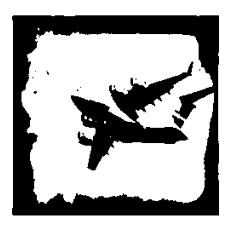

In [106]:
image_grey = cv2.imread("./plane_256x256.png", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey, max_output_value,
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
                                         neighborhood_size, subtract_from_mean) # 적응적 임계처리를 적용
plt.imshow(image_binarized, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

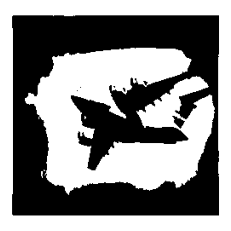

In [99]:
# cv2.ADAPTIVE_THRESH_MEAN_C를 적용합니다.
image_mean_threshold = cv2.adaptiveThreshold(image_grey,
                                             max_output_value,
                                             cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY,
                                             neighborhood_size,
                                             subtract_from_mean)
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()

<h1 style="color:teal"> 배경 제거 </h1>

<li>이미지의 전경만 분리해내려면 원하는 전경 주위에 사각형 박스를 그리고 그랩컷 알고리즘을 실행합니다.</li>
<li>그랩컷은 사각형 밖에 있는 모든 것이 배경이라고 가정하고 이 정보를 사용하여 사각형 안에 있는 배경을 찾습니
다.</li>
<li>검은색 영역은 배경이라고 확실하게 가정한 사각형의 바깥쪽 영역이며, 회색 영역은 그랩컷이 배경이라고 생각하
는 영역이고 흰색 영역은 전경입니다</li>

In [108]:
image_bgr = cv2.imread('./plane_256x256.png') # 이미지 로드
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # RGB로 변환

rectangle = (0, 56, 256, 150) # 사각형 좌표: 시작점의 x, 시작점의 y, 너비, 높이

mask = np.zeros(image_rgb.shape[:2], np.uint8) # 초기 마스크를 만듭니다.

bgdModel = np.zeros((1, 65), np.float64) # grabCut에 사용할 임시 배열을 만듭니다.
fgdModel = np.zeros((1, 65), np.float64)

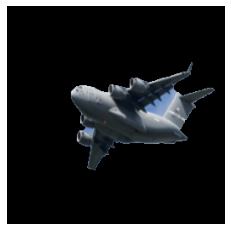

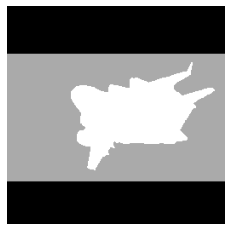

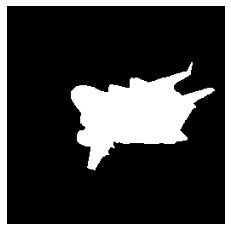

In [109]:
# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
            mask, # 마스크
            rectangle, # 사각형
            bgdModel, # 배경을 위한 임시 배열
            fgdModel, # 전경을 위한 임시 배열
            5, # 반복 횟수
            cv2.GC_INIT_WITH_RECT) # 사각형을 사용한 초기화
            
# 배경인 곳은 0, 그외에는 1로 설정한 마스크를 만듭니다.
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱해 배경을 제외합니다.
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
plt.imshow(image_rgb_nobg), plt.axis("off") # 이미지 출력
plt.show()

plt.imshow(mask, cmap='gray'), plt.axis("off") # 마스크 출력
plt.show()

plt.imshow(mask_2, cmap='gray'), plt.axis("off") # 마스크 출력
plt.show()

<h1 style="color:teal"> 경계선 감지 </h1>

</li><li>캐니(Canny) 경계선 감지기와 같은 경계선 감지 기술 사용
<li>경계선 감지는 컴퓨터 비전의 주요 관심 대상이며 경계선은 많은 정보가 담긴 영역입니다.</li>
<li>경계선 감지를 사용하여 정보가 적은 영역을 제거하고 대부분의 정보가 담긴 이미지 영역을 구분할 수 있습니다.</li>
<li>캐니 감지기는 그레이디언트 임계값의 저점과 고점을 나타내는 두 매개변수가 필요합니다.</li>
<li>낮은 임계값과 높은 임계값 사이의 가능성 있는 경계선 픽셀은 약한 경계선 픽셀로 간주됩니다</li>
<li>OpenCV의 Canny 함수는 낮은 임곗값과 높은 임곗값이 필수 매개변수입니다.</li>
<li>Canny를 전체 이미지 모음에 적용하기 전에 몇 개의 이미지를 테스트하여 낮은 임계값과 높은 임곗값의 적절한 쌍을 찾는 것이 좋은 결과를 만듭니다.</li>
<li>예제 실습은 낮은 임곗값과 높은 임곗값을 이미지 중간 픽셀 강도의 1표준편차 아래 값과 위 값으로 설정</li>

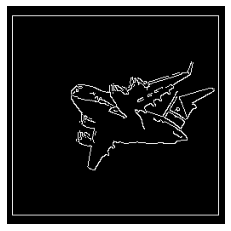

In [110]:
image_gray = cv2.imread("./plane_256x256.png", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
median_intensity = np.median(image_gray) # 픽셀 강도의 중간값을 계산

# 중간 픽셀 강도에서 위아래 1 표준 편차 떨어진 값을 임계값으로 지정합니다.
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# 캐니 경계선 감지기를 적용합니다.
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

<h1 style="color:teal"> 모서리 감지</h1>

<hr>
<li>cornerHarris - 해리스 모서리 감지의 OpenCV 구현</li>
<li>해리스 모서리 감지기는 두 개의 경계선이 교차하는 지점을 감지하는 방법으로 사용됩니다.</li>
<li>모서리는 정보가 많은 포인트입니다.</li>
<li>해리스 모서리 감지기는 윈도(이웃, 패치)안의 픽셀이 작은 움직임에도 크게 변하는 윈도를 찾습니다.</li>
<li>cornerHarris 매개변수 block_size : 각 픽셀에서 모서리 감지에 사용되는 이웃 픽셀 크기</li>
<li>cornerHarris 매개변수 aperture : 사용하는 소벨 커널 크기</li>

In [111]:
image_bgr = cv2.imread("./plane_256x256.png") # 흑백 이미지 로드
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

block_size = 2 # 모서리 감지 매개변수를 설정
aperture = 29
free_parameter = 0.04

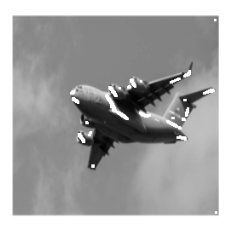

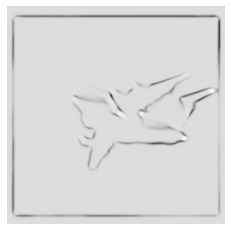

In [112]:
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter) # 모서리를 감지
detector_responses = cv2.dilate(detector_responses, None) # 모서리 표시를 부각시킵니다.

# 임계값보다 큰 감지 결과만 남기고 흰색으로 표시합니다.
threshold = 0.02
image_bgr[detector_responses >
          threshold *
          detector_responses.max()] = [255,255,255]

image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY) # 흑백으로 변환

plt.imshow(image_gray, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

# 가능성이 높은 모서리를 출력합니다.
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

In [126]:
image_bgr = cv2.imread('./plane_256x256.png')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 감지할 모서리 개수
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance) # 모서리를 감지
corners = np.float32(corners)

for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1) # 모서리마다 흰 원을 그립니다.
    
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY) # 흑백 이미지로 변환
plt.imshow(image_rgb, cmap='gray'), plt.axis("off") # 이미지를 출력
plt.show()

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type


<h1 style="color:teal"> 머신러닝 특성 만들기</h1>
<hr>

<li>이미지를 머신러닝에 필요한 샘플로 변환하려면 넘파이의 flatten()을 사용합니다.</li>
<li>Flatten()은 이미지 데이터가 담긴 다차원 배열을 샘플값이 담긴 벡터로 변환</li>
<li>이미지가 흑백일 때 각 픽셀은 하나의 값으로 표현됩니다.</li>
<li>컬럼 이미지라면 각 픽셀이 하나의 값이 아니라 여러 개의 값으로 표현됩니다.</li>
<li>이미지의 모든 픽셀이 특성이 되기 때문에 이미지가 커질수록 특성의 개수도 크게 늘어납니다</li>

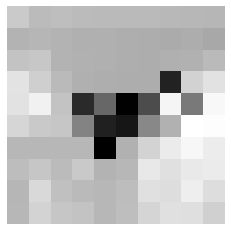

(100,)

In [127]:
image = cv2.imread("./plane_256x256.png", cv2.IMREAD_GRAYSCALE)
image_10x10 = cv2.resize(image, (10, 10)) # 이미지를 10x10 픽셀 크기로 변환
image_10x10.flatten() # 이미지 데이터를 1차원 벡터로 변환

plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

image_10x10.shape
image_10x10.flatten().shape

In [128]:
image_color = cv2.imread("./plane_256x256.png", cv2.IMREAD_COLOR) # 컬러 이미지로 로드
image_color_10x10 = cv2.resize(image_color, (10, 10)) # 이미지를 10 × 10 픽셀 크기로 변환
image_color_10x10.flatten().shape # 이미지 데이터를 1차원 벡터로 변환하고 차원을 출력

(300,)

In [129]:
image_256x256_gray = cv2.imread("./plane_256x256.png", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
image_256x256_gray.flatten().shape # 이미지 데이터를 1차원 벡터로 변환하고 차원을 출력

(65536,)

In [130]:
image_256x256_color = cv2.imread("./plane_256x256.png", cv2.IMREAD_COLOR) # 컬러 이미지로 로드
image_256x256_color.flatten().shape # 이미지 데이터를 1차원 벡터로 변환하고 차원을 출력

(196608,)

 <h1 style="color:teal"> 평균 색을 특성으로 인코딩</h1>
<hr>
<li>이미지의 각 픽셀은 여러 컬러 채널(빨간, 초록, 파랑)의 조합으로 표현되며, 채널의 평균값을 계산하여 이미지의 평균 컬러를 나타내는 세 개의 컬럼 특성을 만듭니다.</li>

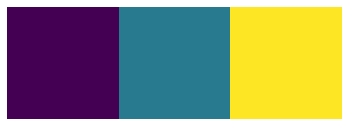

In [131]:
# BGR 이미지로 로드
image_bgr = cv2.imread("./plane_256x256.png", cv2.IMREAD_COLOR)
channels = cv2.mean(image_bgr) # 각 채널의 평균을 계산

# 파랑과 빨강을 바꿉니다(BGR에서 RGB로 만듭니다)
observation = np.array([(channels[2], channels[1], channels[0])])
observation # 채널 평균 값을 확인
plt.imshow(observation), plt.axis("off") # 이미지를 출력
plt.show()

<h1 style="color:teal"> 컬러 히스토그램을 특성으로 인코딩</h1>
<hr>

<li>이미지의 각 픽셀은 여러 컬러 채널(빨간, 초록, 파랑)의 조합으로 표현되며, 채널의 평균값을 계산하여 이미지의 평균 컬러를 나타내는 세 개의 컬럼 특성을 만듭니다.</li>

In [132]:
image_bgr = cv2.imread("./plane_256x256.png", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)# RGB로 변환
features = [] # 특성 값을 담을 리스트
colors = ("r","g","b") # 각 컬러 채널에 대해 히스토그램을 계산

# 각 채널을 반복하면서 히스토그램을 계산하고 리스트에 추가
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # 이미지
                             [i], # 채널 인덱스
                             None, # 마스크 없음
                             [256], # 히스토그램 크기
                             [0,256]) # 범위
    features.extend(histogram)
    
observation = np.array(features).flatten() # 샘플의 특성 값으로 벡터를 만듭니다.
observation[0:5]

array([ 0.,  0.,  2.,  6., 10.], dtype=float32)

[255 255 255]


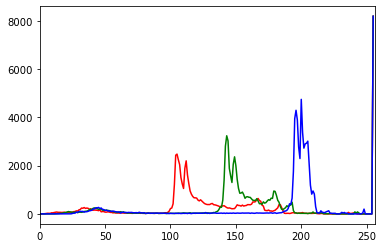

In [139]:
print(image_rgb[0,0])
# RGB 채널 값을 확인

import pandas as pd

colors = ("r","g","b") # 각 컬러 채널에 대한 히스토그램을 계산
# 컬러 채널을 반복하면서 히스토그램을 계산하고 그래프를 그립니다.
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # 이미지
                             [i], # 채널 인덱스
                             None, # 마스크 없음
                             [256], # 히스토그램 크기
                             [0,256]) # 범위
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])
    
plt.show() # 그래프를 출력